In [1]:
# header

# uncomment the pip install part if it doesn't work
# %pip install pybaseball
import pybaseball
from pybaseball import statcast, batting_stats_range, schedule_and_record, playerid_lookup, statcast_pitcher
import pandas as pd
import numpy as np
import sklearn
import sys


In [2]:
# don't re-run this block!!! it will take 10 fkn years
start_dt = '2019-04-01'
end_dt = '2019-04-03'
scast = statcast(start_dt = start_dt, end_dt = end_dt)
print(scast.columns)
bstats = batting_stats_range('2017-05-01', '2017-05-08')

This is a large query, it may take a moment to complete


100%|█████████████████████████████████████████████| 3/3 [00:14<00:00,  4.75s/it]


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

/Users/takaooba/anaconda3/lib/python3.9/site-packages/pybaseball/league_batting_stats.py:64: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  table = table.drop('', 1)


In [3]:
list(scast.columns)

['pitch_type',
 'game_date',
 'release_speed',
 'release_pos_x',
 'release_pos_z',
 'player_name',
 'batter',
 'pitcher',
 'events',
 'description',
 'spin_dir',
 'spin_rate_deprecated',
 'break_angle_deprecated',
 'break_length_deprecated',
 'zone',
 'des',
 'game_type',
 'stand',
 'p_throws',
 'home_team',
 'away_team',
 'type',
 'hit_location',
 'bb_type',
 'balls',
 'strikes',
 'game_year',
 'pfx_x',
 'pfx_z',
 'plate_x',
 'plate_z',
 'on_3b',
 'on_2b',
 'on_1b',
 'outs_when_up',
 'inning',
 'inning_topbot',
 'hc_x',
 'hc_y',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'fielder_2',
 'umpire',
 'sv_id',
 'vx0',
 'vy0',
 'vz0',
 'ax',
 'ay',
 'az',
 'sz_top',
 'sz_bot',
 'hit_distance_sc',
 'launch_speed',
 'launch_angle',
 'effective_speed',
 'release_spin_rate',
 'release_extension',
 'game_pk',
 'pitcher.1',
 'fielder_2.1',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'release_pos_y',
 'estimated_ba_using_speedangle',
 'estimat

In [4]:
scast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11471 entries, 3065 to 3737
Data columns (total 92 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   pitch_type                       11470 non-null  object        
 1   game_date                        11471 non-null  datetime64[ns]
 2   release_speed                    11470 non-null  Float64       
 3   release_pos_x                    11470 non-null  Float64       
 4   release_pos_z                    11470 non-null  Float64       
 5   player_name                      11471 non-null  object        
 6   batter                           11471 non-null  Int64         
 7   pitcher                          11471 non-null  Int64         
 8   events                           2923 non-null   object        
 9   description                      11471 non-null  object        
 10  spin_dir                         0 non-null      Int64  

In [5]:
scast.iloc[:5,:15]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone
3065,SI,2019-04-03,93.2,-2.04,5.96,"Greene, Shane",642180,572888,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,1
3162,SI,2019-04-03,93.7,-1.99,5.99,"Greene, Shane",642180,572888,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,7
3305,SL,2019-04-03,79.9,-2.15,5.92,"Greene, Shane",640449,572888,strikeout,swinging_strike,<NA>,<NA>,<NA>,<NA>,14
3386,SI,2019-04-03,92.4,-1.75,6.06,"Greene, Shane",640449,572888,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,14
3592,SI,2019-04-03,92.7,-1.88,6.12,"Greene, Shane",640449,572888,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,7


In [6]:
scast.iloc[:5,16:32]

,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b
3065,R,L,R,NYY,DET,X,6,ground_ball,0,1,2019,-1.43,0.89,-0.63,2.99,<NA>
3162,R,L,R,NYY,DET,S,<NA>,NaN,0,0,2019,-1.67,0.81,-0.69,1.9,<NA>
3305,R,R,R,NYY,DET,S,2,NaN,3,2,2019,1.92,0.78,1.06,1.89,<NA>
3386,R,R,R,NYY,DET,S,<NA>,NaN,3,1,2019,-1.37,1.09,0.83,2.06,<NA>
3592,R,R,R,NYY,DET,S,<NA>,NaN,3,0,2019,-1.39,1.11,-0.42,1.93,<NA>


In [7]:
scast.iloc[:5,33:49]

,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay
3065,<NA>,2,9,Bot,116.93,145.62,<NA>,<NA>,543308,<NA>,<NA>,6.560096,-135.291088,-3.652248,-18.536202,31.531324
3162,<NA>,2,9,Bot,<NA>,<NA>,<NA>,<NA>,543308,<NA>,<NA>,6.837078,-135.934657,-6.449576,-21.713038,30.328409
3305,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,543308,<NA>,<NA>,3.497283,-116.057831,-3.380048,15.777756,25.494701
3386,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,543308,<NA>,<NA>,9.338278,-134.07731,-6.601347,-18.130846,27.886231
3592,<NA>,1,9,Bot,<NA>,<NA>,<NA>,<NA>,543308,<NA>,<NA>,6.55221,-134.642177,-7.202133,-17.771819,25.986182


In [8]:
scast.iloc[:5,50:68]

,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9
3065,3.41,1.56,87,69.4,7,91.6,2161,5.6,567461,572888,543308,408234,543281,493596,474568,543484,592348,592206
3162,3.73,1.6,<NA>,<NA>,<NA>,92.2,2237,5.6,567461,572888,543308,408234,543281,493596,474568,543484,592348,592206
3305,3.41,1.56,<NA>,<NA>,<NA>,77.9,2762,5.3,567461,572888,543308,408234,543281,493596,474568,543484,592348,592206
3386,3.41,1.63,<NA>,<NA>,<NA>,91.3,2271,5.7,567461,572888,543308,408234,543281,493596,474568,543484,592348,592206
3592,3.46,1.65,<NA>,<NA>,<NA>,91.7,2208,5.5,567461,572888,543308,408234,543281,493596,474568,543484,592348,592206


In [9]:
scast.iloc[:5,69:83]

,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score
3065,0.233,0.222,0.0,1,0,0,2,69,2,Sinker,1,2,1,2
3162,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,69,1,Sinker,1,2,1,2
3305,<NA>,<NA>,0.0,1,0,0,<NA>,68,6,Slider,1,2,1,2
3386,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,68,5,Sinker,1,2,1,2
3592,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,68,4,Sinker,1,2,1,2


In [10]:
scast.iloc[:5,84:92]

,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3065,1,1,2,Strategic,Standard,238,-0.044,-0.096
3162,1,1,2,Strategic,Standard,244,0.0,-0.019
3305,1,1,2,Standard,Strategic,112,-0.064,-0.231
3386,1,1,2,Standard,Strategic,231,0.0,-0.061
3592,1,1,2,Standard,Strategic,231,0.0,-0.05


In [11]:
import numpy as np
import pandas as pd

In [12]:
atbats = pd.read_csv("/Users/takaooba/Downloads/archive (4)/atbats.csv")

In [13]:
ejections = pd.read_csv("/Users/takaooba/Downloads/archive (4)/ejections.csv")
pitches = pd.read_csv("/Users/takaooba/Downloads/archive (4)/pitches.csv")
games = pd.read_csv("/Users/takaooba/Downloads/archive (4)/pitches.csv")
names = pd.read_csv("/Users/takaooba/Downloads/archive (4)/player_names.csv")



In [16]:
atbats.shape

(740389, 11)

<Figure size 20000x150000 with 0 Axes>

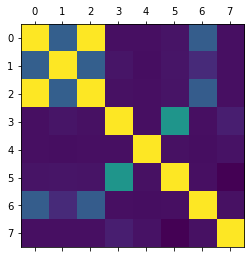

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 150), dpi = 1000)
plt.matshow(atbats.corr())
plt.show()


<AxesSubplot:>

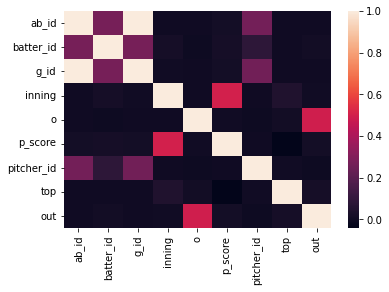

In [59]:
import seaborn as sns
corr = atbats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [20]:
atbats.event.unique()

array(['Groundout', 'Double', 'Single', 'Strikeout', 'Walk', 'Runner Out',
       'Flyout', 'Forceout', 'Pop Out', 'Intent Walk', 'Lineout',
       'Home Run', 'Triple', 'Hit By Pitch', 'Grounded Into DP',
       'Sac Bunt', 'Fielders Choice', 'Bunt Groundout', 'Field Error',
       'Double Play', 'Sac Fly', 'Fielders Choice Out', 'Bunt Pop Out',
       'Catcher Interference', 'Strikeout - DP', 'Batter Interference',
       'Sac Fly DP', 'Bunt Lineout', 'Sacrifice Bunt DP', 'Triple Play'],
      dtype=object)

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
atbats['out'] = (
    atbats['event'].str.contains('out') | 
    atbats['event'].str.contains('Out') | 
    atbats['event'].str.contains('DP') |
    atbats['event'].str.contains('Double Play') | 
    atbats['event'].str.contains('Triple Play') | 
    atbats['event'].str.contains('Fielders Choice') |
    atbats['event'].str.contains('Error') |
    atbats['event'].str.contains('Batter Interference'))




df1 = atbats.groupby(['p_throws','stand','out'])
d = df1['out'].count()
print(d)

p_throws  stand  out  
L         L      False     17747
                 True      38290
          R      False     47841
                 True      94409
R         L      False     85389
                 True     165893
          R      False     93146
                 True     197674
Name: out, dtype: int64


In [ ]:
# First, we will look into left handed pitcher vs left handed batter

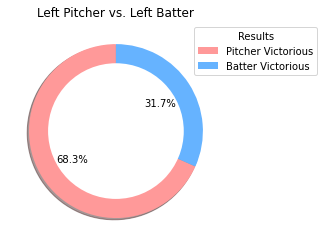

In [42]:
# Initializing the colors
colors = ['#ff9999','#66b3ff']

# Assessing the proportions
ll_outs = d.iloc[1]
ll_total = d.iloc[0] + d.iloc[1]
ll_out_pct = ll_outs/ll_total
ll_hits = ll_total - ll_outs
ll_hit_pct = ll_hits/ll_total

fig1, ax1 = plt.subplots()

# Construction of the pie chart
ax1.pie([ll_out_pct, ll_hit_pct],
        autopct='%1.1f%%', shadow=True, startangle=90, 
         colors = colors)

# Drawing the inner circle
centre = plt.Circle((0,0), 0.78, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre)

# Titles, labels, and legends
ax1.set_title('Left Pitcher vs. Left Batter')
ax1.legend(title="Results",
           loc="upper right", 
           bbox_to_anchor=(1.45,1),
           labels=['Pitcher Victorious', 'Batter Victorious'])

plt.show()

In [ ]:
# We will look into left pitcher vs right batter

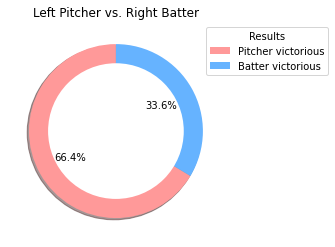

In [53]:
# Assessing the proportions
lr_outs = d.iloc[3]
lr_total = d.iloc[2] + d.iloc[3]
lr_out_pct = lr_outs/lr_total
lr_hits = lr_total - lr_outs
lr_hit_pct = lr_hits/lr_total


# Construction of the pie chart
fig1, ax1 = plt.subplots()
ax1.pie([lr_out_pct, lr_hit_pct],
        autopct='%1.1f%%', shadow=True, startangle=90, 
        colors = colors)


# Drawing the inner circle
centre = plt.Circle((0,0), 0.78, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre)

# Titles, labels, and legends
ax1.set_title('Left Pitcher vs. Right Batter')
ax1.legend(title="Results",
           loc="upper right", 
           bbox_to_anchor=(1.5,1),
           labels=['Pitcher victorious', 'Batter victorious'])

plt.show()

In [48]:
# Next we will look at results for right handed pitchers vs right handed batters

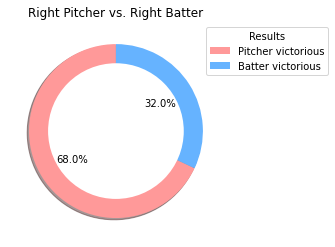

In [54]:
# Assessing the proportions
rr_outs = d.iloc[7]
rr_total = d.iloc[6] + d.iloc[7]
rr_out_pct = rr_outs/rr_total
rr_hits = rr_total - rr_outs
rr_hit_pct = rr_hits/rr_total

# Construction of the pie chart
fig1, ax1 = plt.subplots()
ax1.pie([rr_out_pct, rr_hit_pct], 
        autopct='%1.1f%%', shadow=True, startangle=90, 
        colors = colors)

# Drawing the inner circle
centre = plt.Circle((0,0), 0.78, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre)

# Titles, labels, and legends
ax1.set_title('Right Pitcher vs. Right Batter')
ax1.legend(title="Results",
           loc="upper right", 
           bbox_to_anchor=(1.5,1),
           labels=['Pitcher victorious', 'Batter victorious'])

plt.show()

In [ ]:
# Finally, we will be looking into results of right pitcher vs left batter

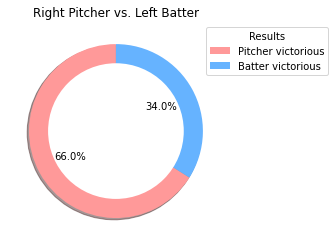

In [65]:
# Assessing the proportions
rl_outs = d.iloc[5]
rl_total = d.iloc[4] + d.iloc[5]
rl_out_pct = rl_outs/rl_total
rl_hits = rl_total - rl_outs
rl_hit_pct = rl_hits/rl_total

# Construction of the pie chart
fig1, ax1 = plt.subplots()
ax1.pie([rl_out_pct, rl_hit_pct], 
        autopct='%1.1f%%', shadow=True, startangle=90, 
        colors = colors)
ax1.set_title('Right Pitcher vs. Left Batter')

# Drawing the inner circle
centre = plt.Circle((0,0), 0.78, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre)

# Titles, labels, and legends
ax1.legend(title="Results",
           loc="upper right", 
           bbox_to_anchor=(1.5,1),
           labels=['Pitcher victorious', 'Batter victorious'])

plt.show()


In [67]:
d

p_throws  stand  out  
L         L      False     17747
                 True      38290
          R      False     47841
                 True      94409
R         L      False     85389
                 True     165893
          R      False     93146
                 True     197674
Name: out, dtype: int64

In [75]:
# right pitcher win rate
rp = d.iloc[0] + d.iloc[1] + d.iloc[2] + d.iloc[3]
rpw = d.iloc[1] + d.iloc[3]

rpwr = rpw / rp
print(rpwr)

0.6692269286438345


In [77]:
# left pitcher win rate
lp = d.iloc[4] + d.iloc[5] + d.iloc[6] + d.iloc[7]
lpw = d.iloc[5] + d.iloc[7]

lpwr = lpw/lp
print(lpwr)

0.6706616098077484


In [79]:
# pitcher win rate
pwr = (rpw + lpw) / (rp + lp)
print(pwr)

0.6702773812144697


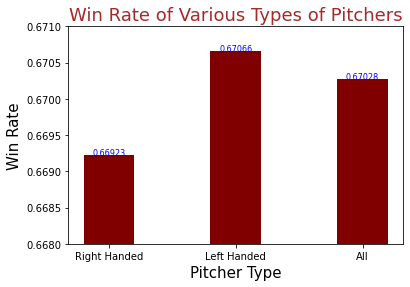

In [123]:
temp = {'Right Handed':rpwr, 'Left Handed':lpwr, 'All':pwr}

pitch_type = list(temp.keys())
vals = list(temp.values())

plt.bar(pitch_type, vals, color ='maroon',
        width = 0.4)
plt.xlabel("Pitcher Type", size = 15)
plt.ylabel("Win Rate", size = 15)
plt.title("Win Rate of Various Types of Pitchers", size = 18, color = "brown")

def addlabels(x,y):
    for i in range(len(x)):

        plt.text(i,y[i],round(y[i],5),ha = 'center', size = 8, color = "blue")

addlabels(pitch_type, vals)

plt.ylim(0.668,0.671)

plt.show()

In [124]:
# Next, we assess the batter's victorious rate

In [126]:
d

p_throws  stand  out  
L         L      False     17747
                 True      38290
          R      False     47841
                 True      94409
R         L      False     85389
                 True     165893
          R      False     93146
                 True     197674
Name: out, dtype: int64

In [128]:
rb = d.iloc[2] + d.iloc[3] + d.iloc[6] + d.iloc[7]
rbw = d.iloc[3] + d.iloc[6]

rbwr = rbw / rb
print(rbwr)

0.43308241161936867


In [131]:
lb = d.iloc[0] + d.iloc[1] + d.iloc[4] + d.iloc[5]
lbw = d.iloc[0] + d.iloc[4]

lbwr = lbw / lb
print(lbwr)

0.3355991656877707


In [133]:
bwr = (rbw + lbw) / (rb + lb)
print(bwr)

0.3926192852676093


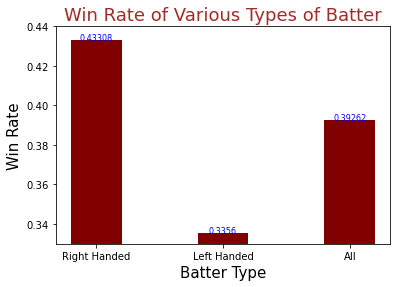

In [137]:
temp = {'Right Handed':rbwr, 'Left Handed':lbwr, 'All':bwr}

bat_type = list(temp.keys())
vals = list(temp.values())

plt.bar(bat_type, vals, color ='maroon',
        width = 0.4)
plt.xlabel("Batter Type", size = 15)
plt.ylabel("Win Rate", size = 15)
plt.title("Win Rate of Various Types of Batter", size = 18, color = "brown")

def addlabels(x,y):
    for i in range(len(x)):

        plt.text(i,y[i],round(y[i],5),ha = 'center', size = 8, color = "blue")

addlabels(bat_type, vals)

plt.ylim(0.33,0.44)

plt.show()